Rising or Regressing? Global Trends in Economic Rights (2017–2023)

This analysis explores how economic rights have changed over time across countries, using data from the Human Rights Measurement Initiative (HRMI). It uses both income-adjusted and global-best benchmarks across income groups to identify whether the world is making progress and where the disparities lie.


In [21]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt


Insight 1: Are economic rights improving globally?

We begin by calculating the global average of the Income-Adjusted Economic and Social Rights (ESR) Scores over time. This helps us understand whether the overall provision of economic rights is improving or declining.

We use:
`esr_hiy_incomeadjusted.csv` for high-income countries
'esr_lmy_incomeadjusted.csv` for low- and middle-income countries


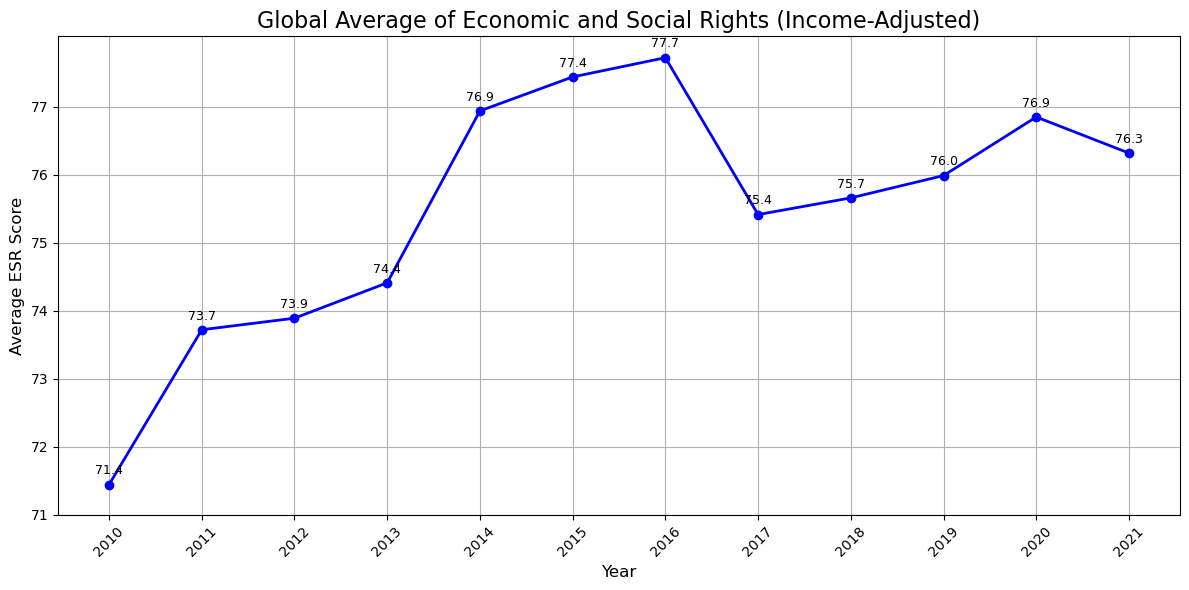

In [56]:
# Load datasets
df_hiy = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_hiy_incomeadjusted.csv")
df_lmy = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_incomeadjusted.csv")

df_hiy_clean = df_hiy[["Country", "Year", "HiY_QofL_All_IAScore"]].rename(columns={"HiY_QofL_All_IAScore": "esr_score"})
df_lmy_clean = df_lmy[["Country", "Year", "LMY_QofL_All_IAScore"]].rename(columns={"LMY_QofL_All_IAScore": "esr_score"})

df_filtered = df_avg[df_avg["Year"] >= 2010]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Year"], df_filtered["esr_score"], marker="o", color="blue", linewidth=2)

# Add point labels
for x, y in zip(df_filtered["Year"], df_filtered["esr_score"]):
    plt.text(x, y + 0.15, f"{y:.1f}", ha='center', fontsize=9)

# Formatting
plt.title("Global Average of Economic and Social Rights (Income-Adjusted)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average ESR Score", fontsize=12)
plt.xticks(df_filtered["Year"], rotation=45)
plt.yticks(range(int(df_filtered["esr_score"].min()), int(df_filtered["esr_score"].max()) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()


Interpretation:
The plot shows the global average of income-adjusted economic and social rights (ESR) scores over time.

From 2010 to around 2017, there is a steady upward trend, suggesting that many countries were making measurable progress in meeting basic economic and social rights obligations (such as health, education, and housing), adjusted for their income levels.

A notable dip occurs after 2017, indicating a temporary decline in performance. This drop could be due to policy changes, funding challenges, global events, or data collection variability. However, the scores begin to recover again after 2019, showing signs of stabilization or slow improvement.

Despite some fluctuations, the long-term trend since 2010 remains positive, implying that—on average—countries are moving closer to fulfilling economic and social rights expectations relative to their resources.

Insight 2: Which countries saw the biggest change?

Now let’s find out which countries improved the most — and which declined — between 2017 and 2023.

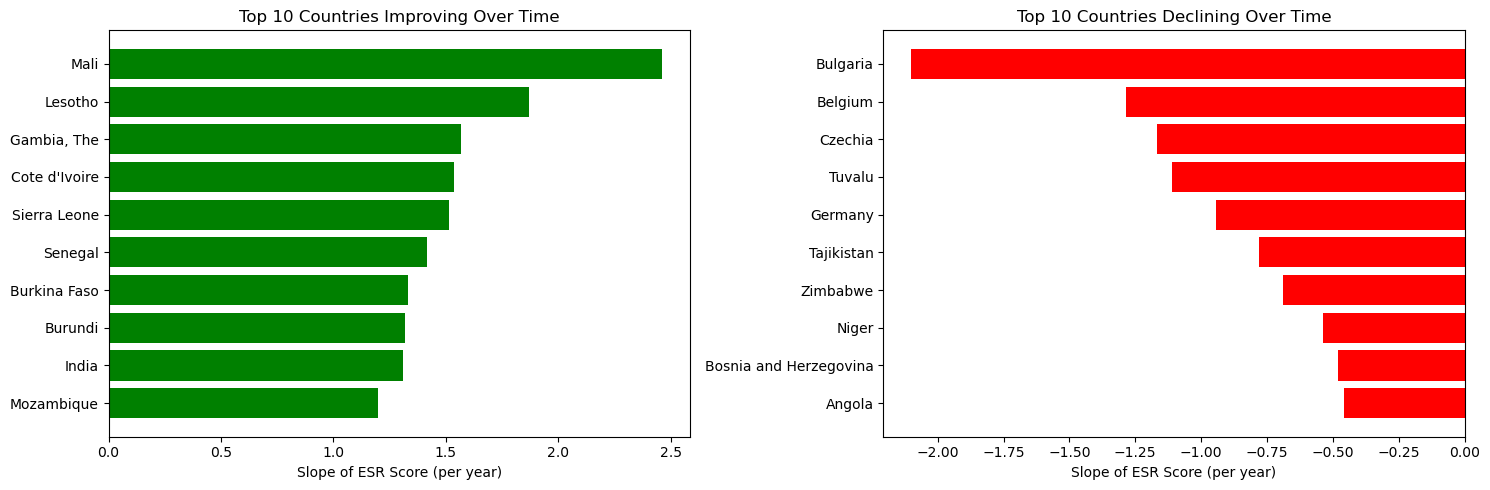

In [50]:
# Get scores in 2017 and 2023
from scipy.stats import linregress

# Create a slope list for each country
slopes = []

# Loop through countries
for country in df["Country"].unique():
    subset = df[df["Country"] == country].dropna()
    if subset["Year"].nunique() >= 3:  # at least 3 points to estimate trend
        x = subset["Year"]
        y = subset["esr_score"]
        slope, _, _, _, _ = linregress(x, y)
        slopes.append({"Country": country, "Slope": slope})

# Turn into DataFrame
df_slopes = pd.DataFrame(slopes)

# Top 10 improving/declining countries based on trend
top_risers = df_slopes.sort_values("Slope", ascending=False).head(10)
top_fallers = df_slopes.sort_values("Slope").head(10)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Left: Top risers
ax[0].barh(top_risers["Country"], top_risers["Slope"], color="green")
ax[0].set_title("Top 10 Countries Improving Over Time")
ax[0].invert_yaxis()
ax[0].set_xlabel("Slope of ESR Score (per year)")

# Right: Top fallers
ax[1].barh(top_fallers["Country"], top_fallers["Slope"], color="red")
ax[1].set_title("Top 10 Countries Declining Over Time")
ax[1].invert_yaxis()
ax[1].set_xlabel("Slope of ESR Score (per year)")

plt.tight_layout()
plt.show()


Interpretation: 
Instead of comparing the trend between just two years, this analysis calculates the trend over time (slope) of every country's income-adjusted ESR score from 2017 to 2023. An increasing slope indicates improvement year by year, and a negative slope indicates a decline.

Top improvers include countries like Mali, Lesotho, and Gambia, which show steady increases in ESR scores year after year. This may reflect progress in delivering education, healthcare, and essential services relative to available resources.
On the other hand, countries like Bulgaria, Belgium, and Czechia have experienced the sharpest declines in ESR performance over this period. A negative trend in these nations might be due to policy regressions, economic challenges, or decreasing alignment with expected human rights standards.
This slope-based approach captures not just point-in-time changes but the overall direction and consistency of each country's performance. It reveals that some lower-income countries are making real gains, while even wealthier or middle-income countries can backslide if economic rights are not prioritized.



Insight 3: Are low-income countries catching up to the global best?

Finally, let’s look at the performance gap between low- and middle-income countries and the global best scores.

We use:
- `esr_lmy_incomeadjusted.csv` for actual scores
- `esr_lmy_globalbest.csv` for benchmark scores


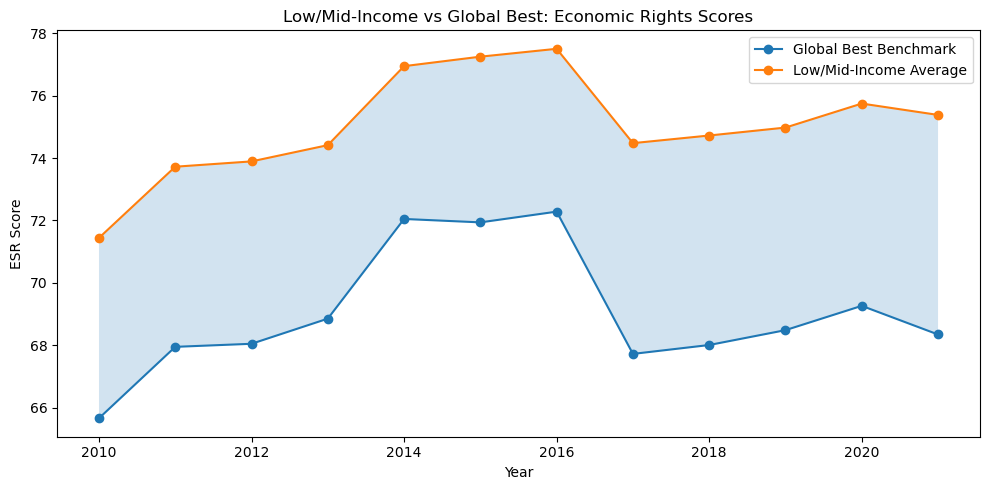

In [55]:
# Load benchmark data
df_lmy_best = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_globalbest.csv")
df_lmy_actual = pd.read_csv("/Users/hyunsupark/Project/qtm151-s25/final_projects/HRMI_Data_Download_2024_release/HRMI_Data_Download_2024.6.20/csv files/esr_lmy_incomeadjusted.csv")

# Group by year
df_lmy_best = df_lmy_best.rename(columns={"LMY_QofL_All_GBScore": "esr_score"})
df_lmy_actual = df_lmy_actual.rename(columns={"LMY_QofL_All_IAScore": "esr_score"})

# Group by year
actual_avg = df_lmy_actual.groupby("Year")["esr_score"].mean().reset_index()
best_avg = df_lmy_best.groupby("Year")["esr_score"].mean().reset_index()

# Merge for comparison
merged = actual_avg.merge(best_avg, on="Year", suffixes=("_actual", "_best"))
merged["gap"] = merged["esr_score_best"] - merged["esr_score_actual"]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(merged["Year"], merged["esr_score_best"], label="Global Best Benchmark", marker="o")
plt.plot(merged["Year"], merged["esr_score_actual"], label="Low/Mid-Income Average", marker="o")
plt.fill_between(merged["Year"], merged["esr_score_actual"], merged["esr_score_best"], alpha=0.2)
plt.title("Low/Mid-Income vs Global Best: Economic Rights Scores")
plt.xlabel("Year")
plt.ylabel("ESR Score")
plt.legend()
plt.tight_layout()
plt.show()


Interpretation: 
This graph compares the average income-adjusted ESR scores of low- and middle-income countries to the global best benchmark from 2010 to 2021. The shaded area indicates the gap between the two.

We are observing a consistent performance gap, with global best scores still far over the LMY (low/mid-income) average. Despite both lines each having an improving trend over years, the gap remains fairly steady, demonstrating that low- and middle-income countries are catching up but not significantly closing the distance to the global ideal.

There is a slight reduction of the gap occurs in the period around 2014–2016, reflecting temporary convergence and re-widening afterward. Despite the progress made, the trend points to the fact that structural inequality and resource limitations continue to challenge lower-income countries to ensure the best achievable results in economic and social rights.

Overall, the evidence indicates that while there is improvement worldwide, equity of progress remains a significant issue. Policy and international support programs may be needed to further accelerate progress for poorer countries.

Conclusion

The analysis reveals a nuanced picture of global progress in economic rights between 2017 and 2023. On average, income-adjusted economic and social rights (ESR) scores have risen globally, suggesting that countries are making meaningful strides in meeting basic rights obligations relative to their resources. However, this progress has not been uniform.

By examining country-level trends, we find that some lower-income nations — such as Mali, Lesotho, and Gambia — have demonstrated consistent improvements, indicating successful efforts in expanding access to education, healthcare, and other vital services. In contrast, several middle- or high-income countries — including Bulgaria, Belgium, and Czechia — have shown declining trends, emphasizing that backsliding can occur even where capacity exists.

When comparing low- and middle-income countries to global best benchmarks, we observe that while both groups are improving, the performance gap remains persistent. This suggests that although progress is occurring, it is not equitably distributed, and lower-income countries continue to face systemic barriers that prevent them from catching up fully.

In short, the world is rising overall, but not fast or evenly enough. If the global community is serious about advancing economic rights for all, more targeted support and sustained policy commitment will be necessary to close the gap and ensure inclusive progress.
